## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>
## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
#Import Necessary Libraris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score,recall_score,f1_score,precision_recall_curve
from sklearn.metrics import confusion_matrix

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#Supress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option("display.max_columns",100)

In [4]:
plt.style.use('seaborn-whitegrid')

# 1: Loading and Cleaning Data

##  1.1  Import Data 

In [5]:
#Reading the Dataset
lead=pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 1.2 Inspect the dataframe

In [6]:
#Inspect the shape
lead.shape

(9240, 37)

In [7]:
#To get statistical summary of  the numeric variables
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
## Check the info to see the types of the feature variables and the null values present
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

* Looks like there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. 
* Also, there are a lot of null values present as well, so we will need to treat them accordingly.

## 2. Data Cleaning and Preparation

#### There are a few columns in which there is a level called `Select` which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [9]:
#value counts of level "Select" in each columns
lead.isin(["Select"]).sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                   1942
How did you hear about X Education               5043
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
#Replacing "Select" with NaN
lead=lead.replace("Select",np.nan)

In [11]:
#sanity check
lead.isin(["Select"]).sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [12]:
null_perc = pd.DataFrame(round((lead.isnull().sum())*100/lead.shape[0],2)).reset_index()
null_perc.columns = ['Column Name', 'Null Values Percentage']
null_value = pd.DataFrame(lead.isnull().sum()).reset_index()
null_value.columns = ['Column Name', 'Null Values']
lead_null = pd.merge(null_value, null_perc, on='Column Name')
lead_null.sort_values("Null Values", ascending = False)

,Column Name,Null Values,Null Values Percentage
13,How did you hear about X Education,7250,78.46
28,Lead Profile,6855,74.19
25,Lead Quality,4767,51.59
33,Asymmetrique Profile Score,4218,45.65
32,Asymmetrique Activity Score,4218,45.65
30,Asymmetrique Activity Index,4218,45.65
31,Asymmetrique Profile Index,4218,45.65
29,City,3669,39.71
12,Specialization,3380,36.58
24,Tags,3353,36.29


#### Observation: There are 17 columns with null values. 7 columns have more than 45% missing values which we should drop as imputing these columns will introduce bias. 

In [13]:
#checking for duplicates
lead.duplicated().sum()

0

* `Prospect ID` & `Lead Number` are two variables that are just indicative of the ID number of the Contacted People & can be dropped. We will also remove the columns which has more than 45% Null Values. 
Also, some of the variables like `Lead Quality`, `Tags`, `Asymmetrique scores` and `profile` etc. are created by the sales team once they contact the potential lead. These variables will not be available for the model building as these features would not be available before the lead is being contacted.
`Last Notable Activity` is an intermediate column which is an update while the sales team representative is in touch with the lead.Thus, we can drop these columns.

In [14]:
drop_columns=['Prospect ID','Lead Number','How did you hear about X Education','Lead Profile',
                'Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score',
               'Asymmetrique Activity Index','Asymmetrique Profile Index','Tags','Last Notable Activity']

In [15]:
#dropping irrelevant columns
lead=lead.drop(drop_columns,axis=1)

In [16]:
#sanity check
lead.shape

(9240, 26)

### 2.1 Null value analysis on Categorical columns

In [17]:
#categorical columns in the dataset
categorical_columns=lead.select_dtypes(exclude="number").columns.tolist()
categorical_columns

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

In [18]:
# Checking unique values and null values for each categorical columns
df_cat = pd.DataFrame(columns=["columns","unique_values","null_values","null_percent"])
df_temp=pd.DataFrame()
for column in categorical_columns:
        df_temp["columns"] = [column]
        df_temp["unique_values"] = lead[column].nunique()
        df_temp["null_values"] = lead[column].isna().sum()
        df_temp["null_percent"] = (lead[column].isna().sum()/len(lead)*100).round(1)
        df_cat=df_cat.append(df_temp)
df_cat.sort_values("null_values", ascending =False, inplace=True)        
df_cat.set_index("columns",inplace=True)       
df_cat

,unique_values,null_values,null_percent
columns,,,
City,6,3669,39.7
Specialization,18,3380,36.6
What matters most to you in choosing a course,3,2709,29.3
What is your current occupation,6,2690,29.1
Country,38,2461,26.6
Last Activity,17,103,1.1
Lead Source,21,36,0.4
Lead Origin,5,0,0.0
Digital Advertisement,2,0,0.0


#### Observation : Few columns have only 1 category.Example - `Magazine`,`I agree to pay the amount through cheque` etc. These columns will not add any value to the model and can be deleted.

In [19]:
# columns with unique values

columns_to_drop = df_cat[df_cat['unique_values']==1].index.values.tolist() 
columns_to_drop

['I agree to pay the amount through cheque',
 'Get updates on DM Content',
 'Update me on Supply Chain Content',
 'Receive More Updates About Our Courses',
 'Magazine']

In [20]:
#dropping above columns
lead=lead.drop(columns_to_drop,axis=1)
lead.shape

(9240, 21)

In [21]:
#sanity check
categorical_columns = lead.select_dtypes(exclude =["number"]).columns.values
df_cat = pd.DataFrame(columns=["columns","unique_values","null_values","null_percent"])
df_temp=pd.DataFrame()
for column in categorical_columns:
        df_temp["columns"] = [column]
        df_temp["unique_values"] = lead[column].nunique()
        df_temp["null_values"] = lead[column].isna().sum()
        df_temp["null_percent"] = (lead[column].isna().sum()/len(lead)*100).round(1)
        df_cat=df_cat.append(df_temp)
df_cat.sort_values("null_values", ascending =False, inplace=True)        
df_cat.set_index("columns",inplace=True)       
df_cat

,unique_values,null_values,null_percent
columns,,,
City,6,3669,39.7
Specialization,18,3380,36.6
What matters most to you in choosing a course,3,2709,29.3
What is your current occupation,6,2690,29.1
Country,38,2461,26.6
Last Activity,17,103,1.1
Lead Source,21,36,0.4
X Education Forums,2,0,0.0
Through Recommendations,2,0,0.0


#### `City` column

In [22]:
#Dropping city column as it has 40% null values, imputing with mode will skew the data & is not useful for our analysis

lead=lead.drop("City",axis=1)

In [23]:
lead.shape

(9240, 20)

#### `Specialization` column

In [24]:
lead["Specialization"].value_counts(normalize=True,dropna=False)*100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

#### It may be possible that the lead has no specialization or may be a student and has no work experience yet , thus he/she has not entered any value. We will create a new category called 'Not applicable' to replace the null values

In [25]:
#Replacing missing values with "Not provided"
lead["Specialization"].replace(np.nan,"Not applicable",inplace=True)

In [26]:
#sanity Check
lead["Specialization"].value_counts(normalize=True,dropna=False)*100

Not applicable                       36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

#### `What matters most to you in choosing a course` column

In [27]:
lead['What matters most to you in choosing a course'].value_counts(normalize = True,dropna=False)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [28]:
#dropping the column as its skewed
lead=lead.drop("What matters most to you in choosing a course",axis=1)

In [29]:
lead.shape

(9240, 19)

#### `What is your current occupation` column

In [30]:
lead['What is your current occupation'].value_counts(normalize = True,dropna=False)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [31]:
# data will be skewed if we impute column with mode hence replacing nan values with "Not specified"
lead["What is your current occupation"].replace(np.nan,"Not specified",inplace=True)

In [32]:
#sanity check
lead['What is your current occupation'].isnull().sum()

0

#### `Country` column

In [33]:
lead['Country'].value_counts(normalize = True,dropna=False)*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Nigeria                  0.043290
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Germany                  0.043290
Sweden                   0.032468
Italy                    0.021645
Philippines              0.021645
Netherlands              0.021645
China                    0.021645
Bangladesh               0.021645
Asia/Pacific Region      0.021645
Belgium                  0.021645
Uganda                   0.021645
Ghana                    0.021645
Denmark       

In [34]:
#Dropping Country column as its irrelevant to our analysis and its highly skewed if imputed with mode vlaue
lead=lead.drop("Country",axis=1)

In [35]:
#sanity check
lead.shape

(9240, 18)

#### `Last Activity` column

In [36]:
lead['Last Activity'].value_counts(normalize = True,dropna=False)*100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Marked Spam                0.021645
Email Received                   0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [37]:
# Replacing nan values with Mode vlaue "Email Opened"
lead['Last Activity'].replace(np.nan,"Email Opened",inplace=True)

In [38]:
#Sanity Check
lead['Last Activity'].isnull().sum()

0

#### `Lead Source` column

In [39]:
lead['Lead Source'].value_counts(normalize = True,dropna=False)*100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Live Chat             0.021645
Press_Release         0.021645
Social Media          0.021645
NC_EDM                0.010823
welearnblog_Home      0.010823
youtubechannel        0.010823
WeLearn               0.010823
Pay per Click Ads     0.010823
testone               0.010823
blog                  0.010823
Name: Lead Source, dtype: float64

In [40]:
# Replacing nan values with Mode vlaue "Google", also category "google" with Google
lead['Lead Source'].replace(np.nan,"Google",inplace=True)
lead['Lead Source'].replace(['google'], 'Google',inplace=True)

In [41]:
#sanity check
lead['Lead Source'].isnull().sum()

0

In [42]:
#columns with skewed data
skewed_columns=['Do Not Call','Search', 'Newspaper', 'Newspaper Article', 'Digital Advertisement', 'X Education Forums','Through Recommendations']

for i in skewed_columns:
    print(f"{i}_column \n {lead[i].value_counts()}\n\n")

Do Not Call_column 
 No     9238
Yes       2
Name: Do Not Call, dtype: int64


Search_column 
 No     9226
Yes      14
Name: Search, dtype: int64


Newspaper_column 
 No     9239
Yes       1
Name: Newspaper, dtype: int64


Newspaper Article_column 
 No     9238
Yes       2
Name: Newspaper Article, dtype: int64


Digital Advertisement_column 
 No     9236
Yes       4
Name: Digital Advertisement, dtype: int64


X Education Forums_column 
 No     9239
Yes       1
Name: X Education Forums, dtype: int64


Through Recommendations_column 
 No     9233
Yes       7
Name: Through Recommendations, dtype: int64




In [43]:
#Dropping skewed columns
lead.drop(skewed_columns,axis=1,inplace=True)

In [44]:
#sanity check
lead.shape

(9240, 11)

### 2.2 Null value analysis on Numerical columns

In [45]:
#numerical columns in the dataset
numerical_columns=lead.select_dtypes(include="number").columns.tolist()
numerical_columns

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [46]:
df_num = pd.DataFrame(columns=["columns","unique_values","null_values","null_percent"])
df_temp=pd.DataFrame()
for column in numerical_columns:
        df_temp["columns"] = [column]
        df_temp["unique_values"] = lead[column].nunique()
        df_temp["null_values"] = lead[column].isna().sum()
        df_temp["null_percent"] = (lead[column].isna().sum()/len(lead)*100).round(1)
        df_num=df_num.append(df_temp)
df_num.sort_values("null_values", ascending =False, inplace=True)        
df_num.set_index("columns",inplace=True)       
df_num

,unique_values,null_values,null_percent
columns,,,
TotalVisits,41,137,1.5
Page Views Per Visit,114,137,1.5
Converted,2,0,0.0
Total Time Spent on Website,1731,0,0.0


#### `TotalVisits` column

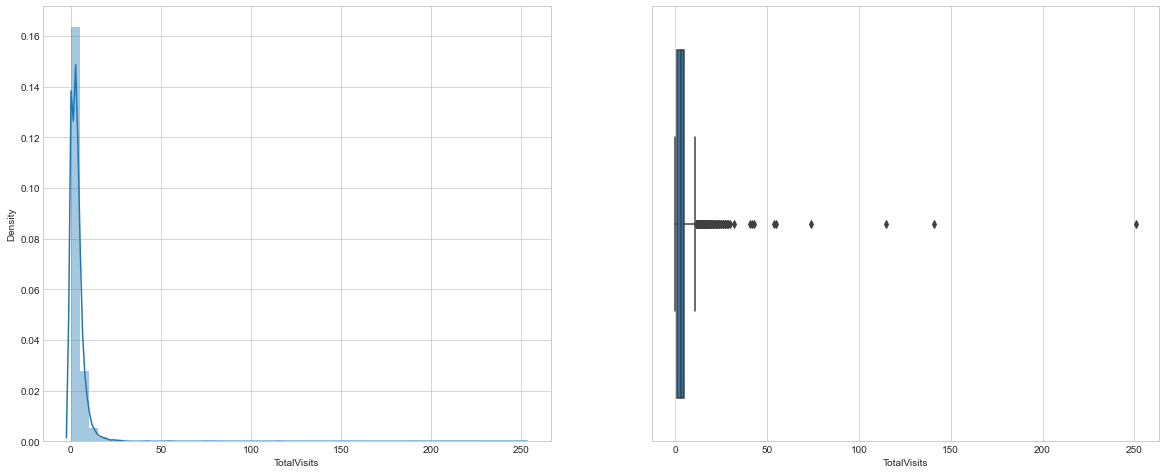

In [47]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.distplot(lead['TotalVisits'])
plt.subplot(1,2,2)
sns.boxplot(lead['TotalVisits'])
plt.show()

In [48]:
#imputing null values with median values
lead["TotalVisits"].fillna(lead["TotalVisits"].median(),inplace=True)

In [49]:
#sanity check
lead["TotalVisits"].isnull().sum()

0

#### `Page Views Per Visit	` column

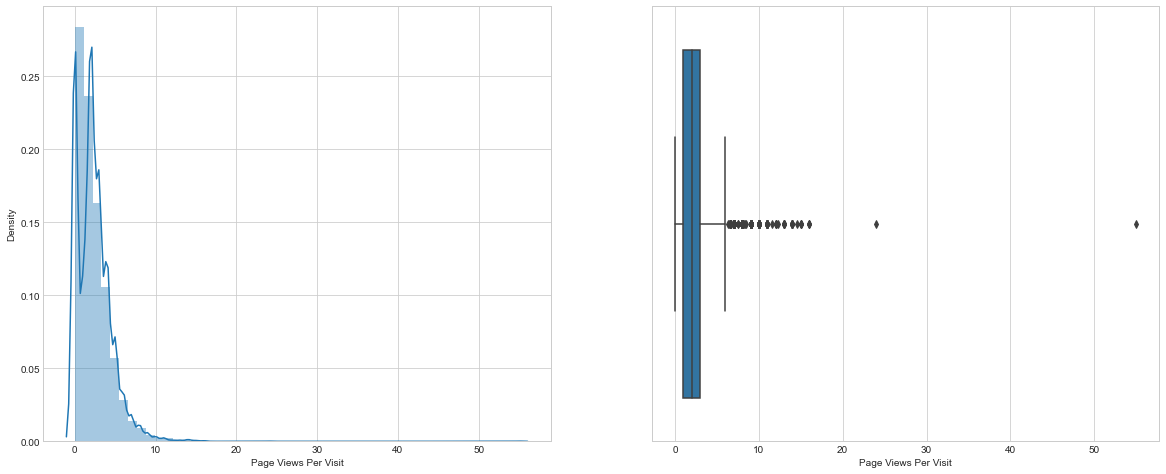

In [50]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.distplot(lead['Page Views Per Visit'])
plt.subplot(1,2,2)
sns.boxplot(lead['Page Views Per Visit'])
plt.show()

In [51]:
#imputing null values with median values
lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median(), inplace=True)


In [52]:
#sanity check
lead['Page Views Per Visit'].isnull().sum()

0

### 3. EDA

### Data Imbalance

In [53]:
lead['Converted'].value_counts(normalize=True)*100

0    61.461039
1    38.538961
Name: Converted, dtype: float64

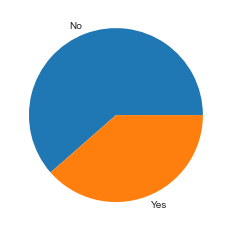

In [54]:
plt.pie(lead['Converted'].value_counts(),labels=["No","Yes"])
plt.show()

#### Observation: In the lead conversion ration, 38.5% has converted to leads where as 61.5% did not convert to a lead. Dataset is Balanced

### 3.1 Univariate & Bivariate Analysis - Categorical Columns

In [55]:
#Categorical Columns
lead.select_dtypes(exclude="number").columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview'],
      dtype='object')

#### `Lead Origin` column

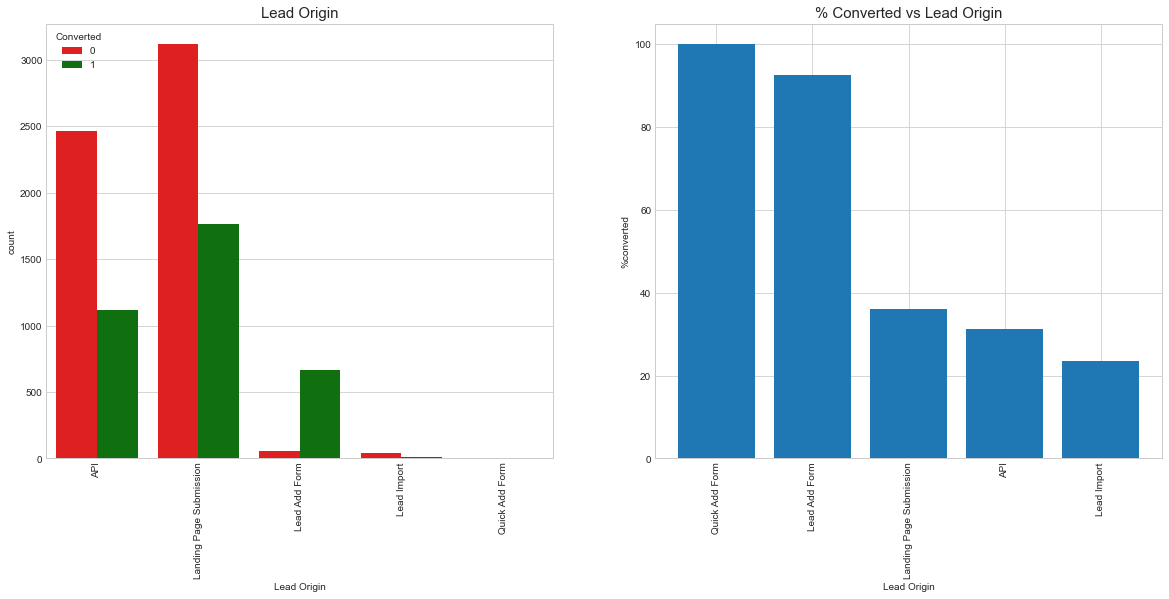

In [56]:
# Plotting counts
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
plt.title("Lead Origin",fontdict={"fontsize":15})
sns.countplot( lead["Lead Origin"],hue =lead["Converted"],palette=['r','g'])
plt.xticks(rotation=90)

#percentage Converted vs Lead Origin
plt.subplot(1,2,2)
cat_perc = lead[["Lead Origin", 'Converted']].groupby(["Lead Origin"],as_index=False).mean()
cat_perc["Converted"] = cat_perc["Converted"]*100
cat_perc.sort_values(by='Converted', ascending=False, inplace=True)
plt.bar(cat_perc["Lead Origin"],cat_perc["Converted"])
plt.xticks(rotation=90)
plt.ylabel("%converted")
plt.xlabel("Lead Origin")
plt.title("% Converted vs Lead Origin",fontdict={"fontsize":15})
plt.show()


#### Observation:
* Most of the Leads originated from submissions on the landing page and  followed by API, where around 30% are converted.
* Leads from Quick Add Form are 100% Converted, there was just 1 lead from that category. 
* Leads from the Lead Add Form are the next highest conversions in this category at around 90% of 718 leads.
* Lead Import are very less in count and conversion rate is also the lowest 
* To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form

#### `Lead Source` column

In [57]:
lead["Lead Source"].value_counts(normalize=True)*100

Google               31.482684
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
Click2call            0.043290
Live Chat             0.021645
Press_Release         0.021645
Social Media          0.021645
NC_EDM                0.010823
welearnblog_Home      0.010823
youtubechannel        0.010823
WeLearn               0.010823
Pay per Click Ads     0.010823
testone               0.010823
blog                  0.010823
Name: Lead Source, dtype: float64

In [58]:
#Renaming smaller  levels as "Other Lead sources"
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other Lead Sources')

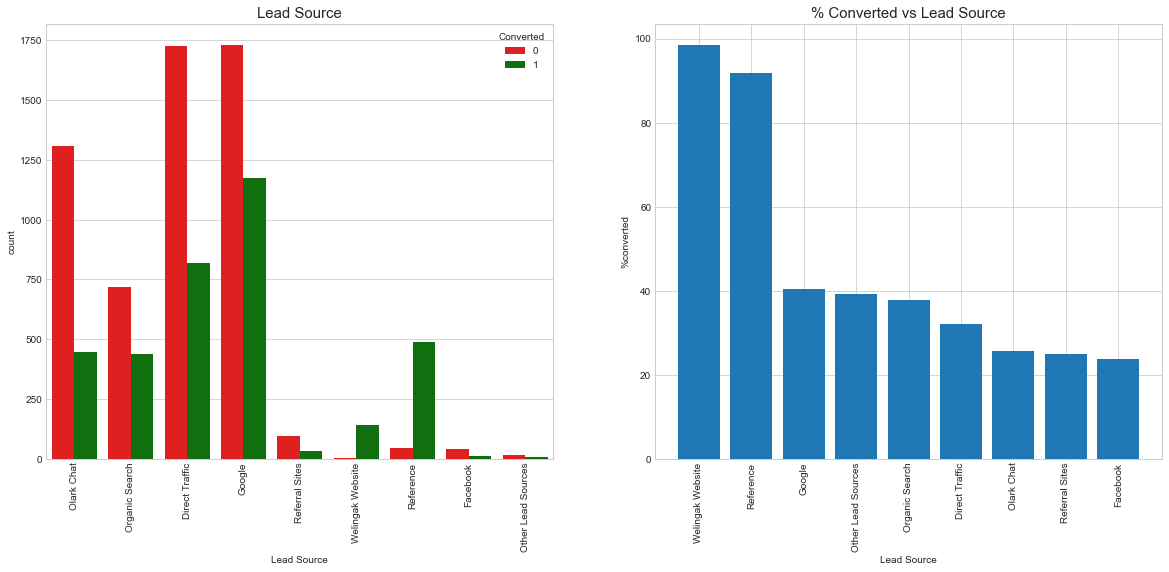

In [59]:
# Plotting counts
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
plt.title("Lead Source",fontdict={"fontsize":15})
sns.countplot( lead["Lead Source"],hue =lead["Converted"],palette=['r','g'])
plt.xticks(rotation=90)

#percentage Converted vs Lead Origin
plt.subplot(1,2,2)
cat_perc = lead[["Lead Source", 'Converted']].groupby(["Lead Source"],as_index=False).mean()
cat_perc["Converted"] = cat_perc["Converted"]*100
cat_perc.sort_values(by='Converted', ascending=False, inplace=True)
plt.bar(cat_perc["Lead Source"],cat_perc["Converted"])
plt.xticks(rotation=90)
plt.ylabel("%converted")
plt.xlabel("Lead Source")
plt.title("% Converted vs Lead Source",fontdict={"fontsize":15})
plt.show()

#### Observation:
* The source of most leads is Google, and 40% of the leads converted, followed by Direct Traffic,Organic search and Olark chat
* A lead that came from a reference has over 90% conversion from the total of 534.
* Welingak Website has almost 100% lead conversion rate. This option should be explored more to increase lead conversion
* To increase lead count, initiatives should be taken so already exitsing members increase their referrals.

#### `Do Not Email` column

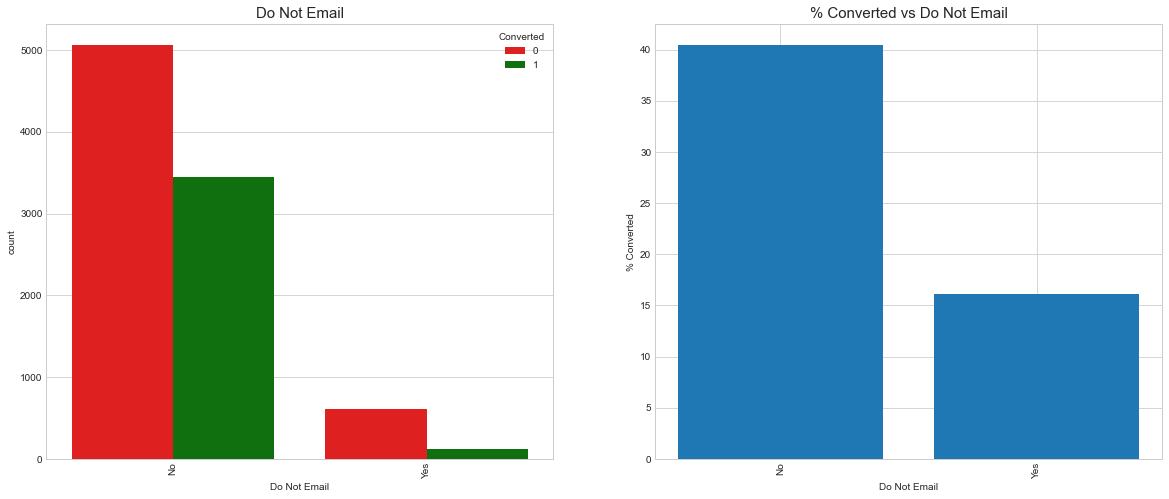

In [60]:
# Plotting counts
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
plt.title("Do Not Email",fontdict={"fontsize":15})
sns.countplot( lead["Do Not Email"],hue =lead["Converted"],palette=['r','g'])
plt.xticks(rotation=90)

#percentage Converted vs Lead Origin
plt.subplot(1,2,2)
cat_perc = lead[["Do Not Email", 'Converted']].groupby(["Do Not Email"],as_index=False).mean()
cat_perc["Converted"] = cat_perc["Converted"]*100
cat_perc.sort_values(by='Converted', ascending=False, inplace=True)
plt.bar(cat_perc["Do Not Email"],cat_perc["Converted"])
plt.xticks(rotation=90)
plt.ylabel("% Converted")
plt.xlabel("Do Not Email")
plt.title("% Converted vs Do Not Email",fontdict={"fontsize":15})
plt.show()

#### Observation:
* Majority of the people  want Email  (~92%) 
* People who are  ok with Email has conversion rate of 40%
* People who have opted  to receive Email has higher rate of conversion (40%) 

#### `Last Activity` column 

In [61]:
lead['Last Activity'].value_counts(normalize=True)*100

Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Marked Spam                0.021645
Email Received                   0.021645
Resubscribed to emails           0.010823
Visited Booth in Tradeshow       0.010823
Name: Last Activity, dtype: float64

In [62]:
# Combining smaller last activities  "Other Activities"
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked','Visited Booth in Tradeshow', 'Approached upfront','Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activities')

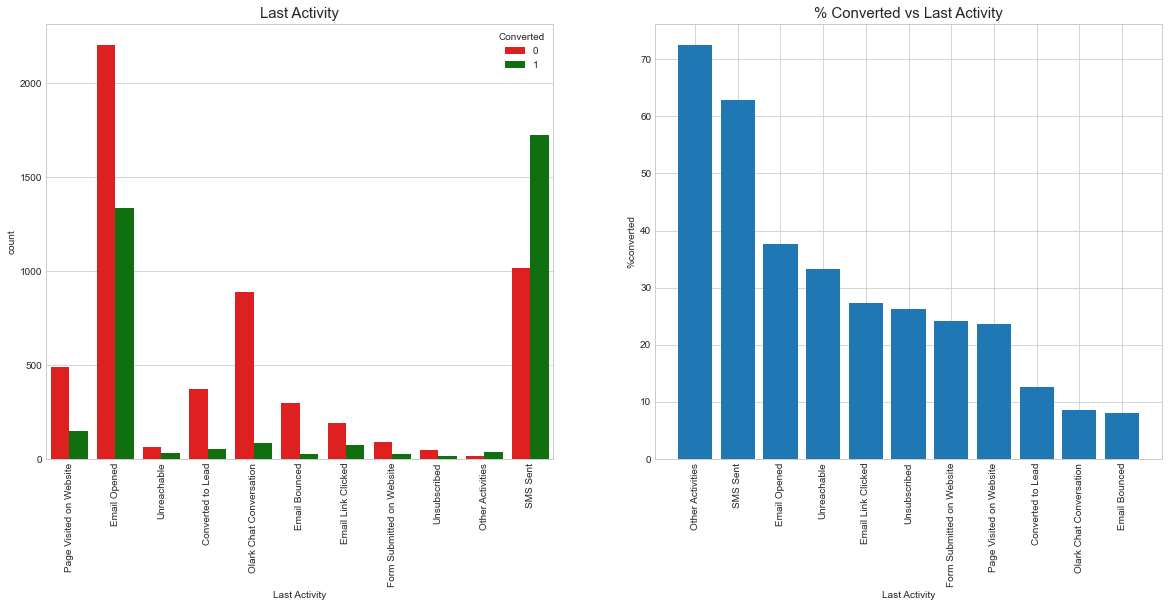

In [63]:
# Plotting counts
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
plt.title("Last Activity",fontdict={"fontsize":15})
sns.countplot( lead["Last Activity"],hue =lead["Converted"],palette=['r','g'])
plt.xticks(rotation=90)

#percentage Converted vs Lead Origin
plt.subplot(1,2,2)
cat_perc = lead[["Last Activity", 'Converted']].groupby(["Last Activity"],as_index=False).mean()
cat_perc["Converted"] = cat_perc["Converted"]*100
cat_perc.sort_values(by='Converted', ascending=False, inplace=True)
plt.bar(cat_perc["Last Activity"],cat_perc["Converted"])
plt.xticks(rotation=90)
plt.ylabel("%converted")
plt.xlabel("Last Activity")
plt.title("% Converted vs Last Activity",fontdict={"fontsize":15})
plt.show()

#### Observation:
* Most of the lead have their Email opened as their last activity
* After combining smaller Last Activity types as Other Activities, the lead conversion is very high (~70%)
* Conversion rate for leads with last activity as SMS Sent is almost 60%

#### `Specialization` column  

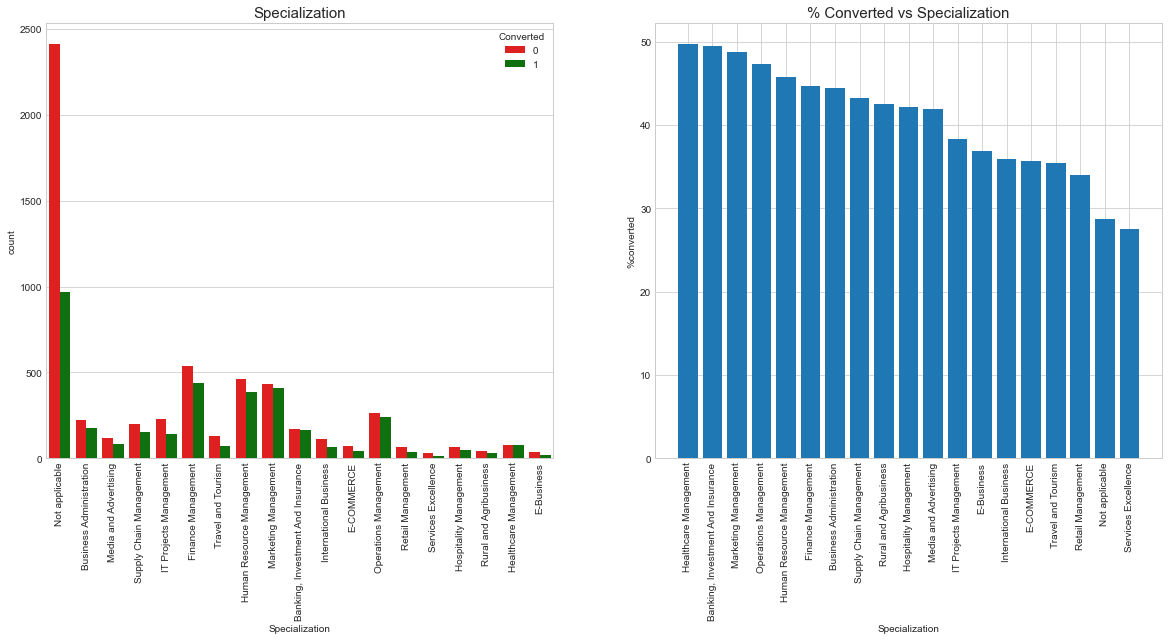

In [64]:
# Plotting counts
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
plt.title("Specialization",fontdict={"fontsize":15})
sns.countplot( lead["Specialization"],hue =lead["Converted"],palette=['r','g'])
plt.xticks(rotation=90)

#percentage Converted vs Lead Origin
plt.subplot(1,2,2)
cat_perc = lead[["Specialization", 'Converted']].groupby(["Specialization"],as_index=False).mean()
cat_perc["Converted"] = cat_perc["Converted"]*100
cat_perc.sort_values(by='Converted', ascending=False, inplace=True)
plt.bar(cat_perc["Specialization"],cat_perc["Converted"])
plt.xticks(rotation=90)
plt.ylabel("%converted")
plt.xlabel("Specialization")
plt.title("% Converted vs Specialization",fontdict={"fontsize":15})
plt.show()

#### Observation:
* Most of the leads have not mentioned a specialization and around 28% of those converted
* Leads with Banking Investment and insurance and Marketing Management - Over 45% Converted

#### `What is your current occupation` column

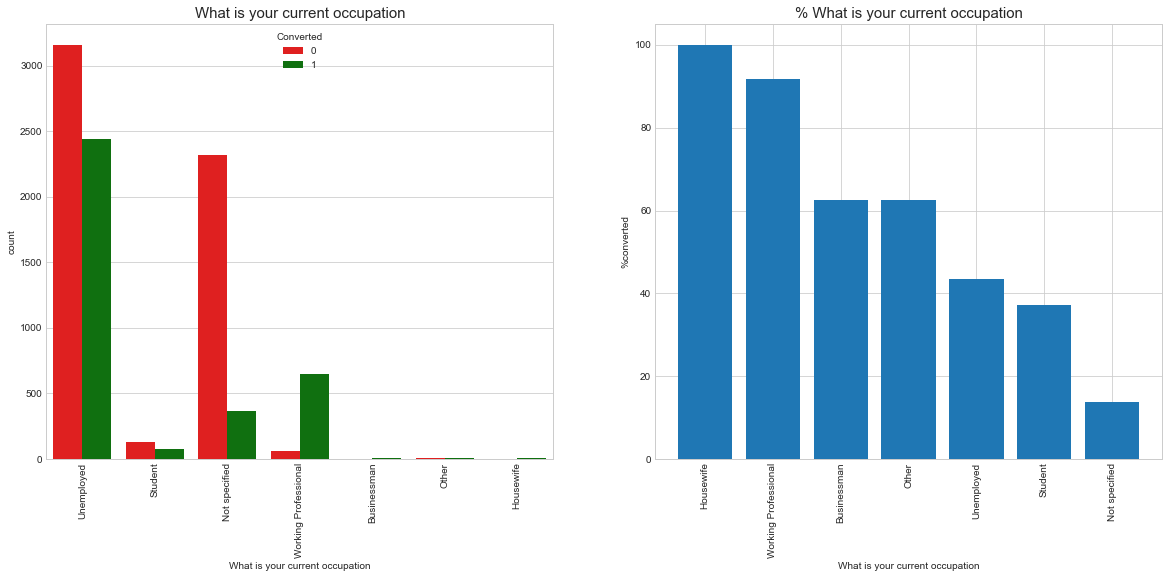

In [65]:
# Plotting counts
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
plt.title("What is your current occupation",fontdict={"fontsize":15})
sns.countplot( lead["What is your current occupation"],hue =lead["Converted"],palette=['r','g'])
plt.xticks(rotation=90)

#percentage Converted vs Lead Origin
plt.subplot(1,2,2)
cat_perc = lead[["What is your current occupation", 'Converted']].groupby(["What is your current occupation"],as_index=False).mean()
cat_perc["Converted"] = cat_perc["Converted"]*100
cat_perc.sort_values(by='Converted', ascending=False, inplace=True)
plt.bar(cat_perc["What is your current occupation"],cat_perc["Converted"])
plt.xticks(rotation=90)
plt.ylabel("%converted")
plt.xlabel("What is your current occupation")
plt.title("% What is your current occupation",fontdict={"fontsize":15})
plt.show()

#### Observation:
* Housewives are less in numbers, but have 100% conversion rate
* Working professionals, Businessmen and Other have high conversion rate
* Leads with Unemployed occupation is highest in number,but the conversion rate is low (~40%)

#### `A free copy of Mastering The Interview` column 

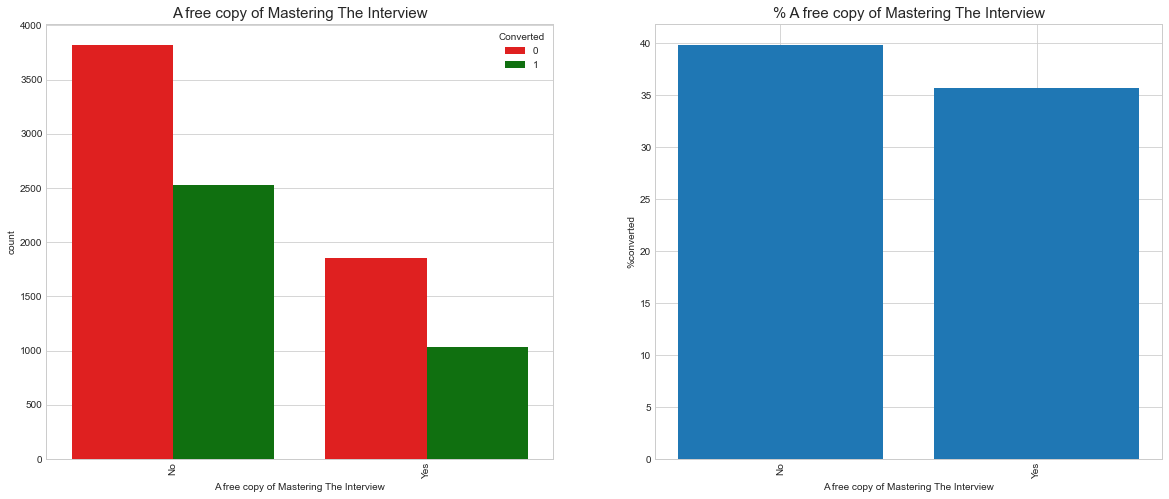

In [66]:
# Plotting counts
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
plt.title("A free copy of Mastering The Interview",fontdict={"fontsize":15})
sns.countplot( lead["A free copy of Mastering The Interview"],hue =lead["Converted"],palette=['r','g'])
plt.xticks(rotation=90)

#percentage Converted vs Lead Origin
plt.subplot(1,2,2)
cat_perc = lead[["A free copy of Mastering The Interview", 'Converted']].groupby(["A free copy of Mastering The Interview"],as_index=False).mean()
cat_perc["Converted"] = cat_perc["Converted"]*100
cat_perc.sort_values(by='Converted', ascending=False, inplace=True)
plt.bar(cat_perc["A free copy of Mastering The Interview"],cat_perc["Converted"])
plt.xticks(rotation=90)
plt.ylabel("%converted")
plt.xlabel("A free copy of Mastering The Interview")
plt.title("% A free copy of Mastering The Interview",fontdict={"fontsize":15})
plt.show()

#### Observation:
* Distributing Free-Copy of Mastering Interview doesn't seem affect the conversion as the coenversion rate is almost same.

In [67]:
#Dropping A free copy of Mastering The Interview column
lead.drop("A free copy of Mastering The Interview",axis=1,inplace=True)

In [68]:
#sanity check
lead.shape

(9240, 10)

### 3.2 Univariate & Bivariate Analysis - Numerical Columns

In [69]:
#Numerical columns
lead.select_dtypes(include="number").columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

#### `TotalVisits` column  

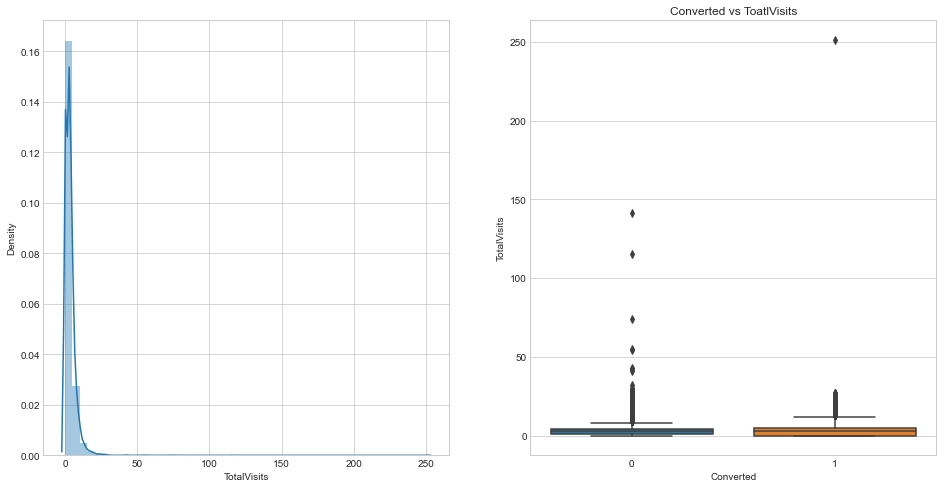

In [70]:
plt.figure(figsize=[16,8])
plt.subplot(1,2,1)
sns.distplot(lead["TotalVisits"])

plt.subplot(1,2,2)
plt.title("Converted vs ToatlVisits")
sns.boxplot(y=lead["TotalVisits"],x=lead["Converted"])
plt.show()

#### Observation:
* Presence of outliers in TotalVisit column 

#### `Total Time Spent on Website` column  

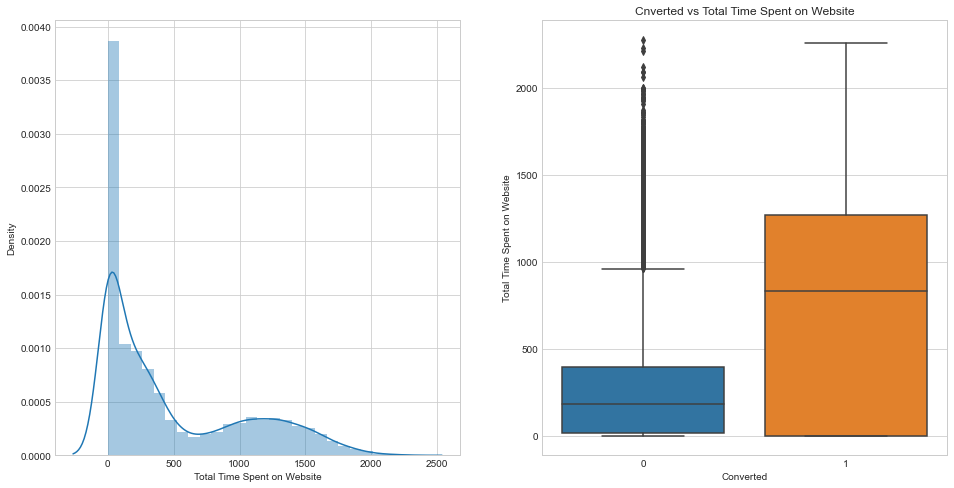

In [71]:
plt.figure(figsize=[16,8])
plt.subplot(1,2,1)
sns.distplot(lead["Total Time Spent on Website"])

plt.subplot(1,2,2)
plt.title("Cnverted vs Total Time Spent on Website")
sns.boxplot(y=lead["Total Time Spent on Website"],x=lead["Converted"])
plt.show()

#### Observation:
* Presence of outliers in Total Time Spent on Website column 

#### ` Page Views Per Visit` column  

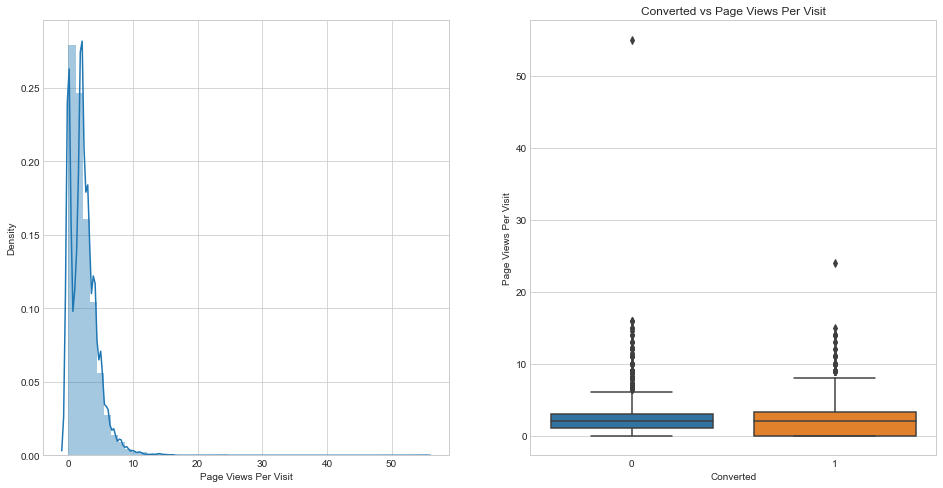

In [72]:
plt.figure(figsize=[16,8])
plt.subplot(1,2,1)
sns.distplot(lead["Page Views Per Visit"])

plt.subplot(1,2,2)
plt.title("Converted vs Page Views Per Visit")
sns.boxplot(y=lead["Page Views Per Visit"],x=lead["Converted"])
plt.show()

#### Observation:
* Presence of outliers in Total Time Spent on Website column 

### 3.3 Multivariate Analysis - Numerical Columns


<AxesSubplot:>

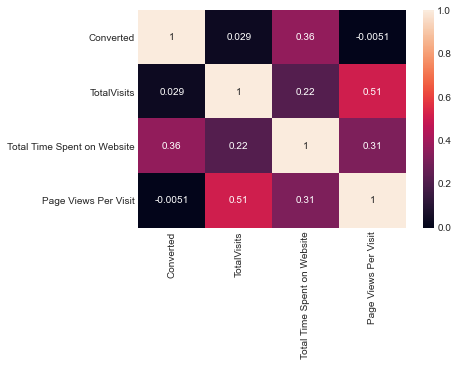

In [73]:
sns.heatmap(lead[['Converted', 'TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']].corr(),annot=True)

#### Observation:
* TotalVisits has decent positive correlation with Target varibale

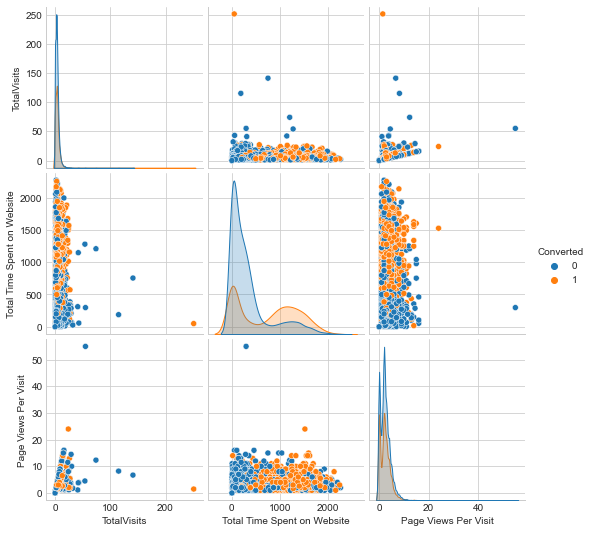

In [74]:

sns.pairplot(lead,hue="Converted",kind='scatter')
plt.show()

#### Observation:
* Data is not normally distributed.

### 4. Data Preparation

In [75]:
#Percentile Values
lead.describe(percentiles=[0.10,0.25,0.50,0.75,0.95,0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
99%,1.000000,17.000000,1840.610000,9.000000


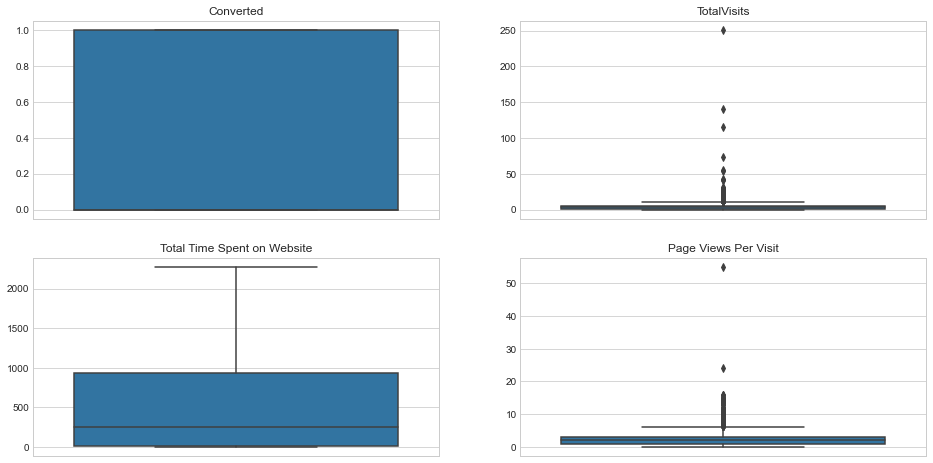

In [76]:
#Plotting the numerical columns for outliers
i=1
plt.figure(figsize=[16,8])
for col in ['Converted', 'TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']:
    plt.subplot(2,2,i)
    sns.boxplot(y=lead[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

#### Observation:
* Logistic Regression is heavily influenced by outliers.
* Cap the outlier values of TotalVisits and Page Views Per Visit to their 95th percentile, instead of deleting the outliers as outliers are large in number

In [77]:
# Capping the outliers of TotalVisits column to 99th percentile value

Q4=lead["TotalVisits"].quantile(0.95)
lead.loc[lead["TotalVisits"] >= Q4,"TotalVisits"]=Q4

In [78]:
# Capping the outliers of Page Views Per Visit column to 99th percentile value

Q4=lead["Page Views Per Visit"].quantile(0.95)
lead.loc[lead["Page Views Per Visit"] >= Q4,"Page Views Per Visit"]=Q4

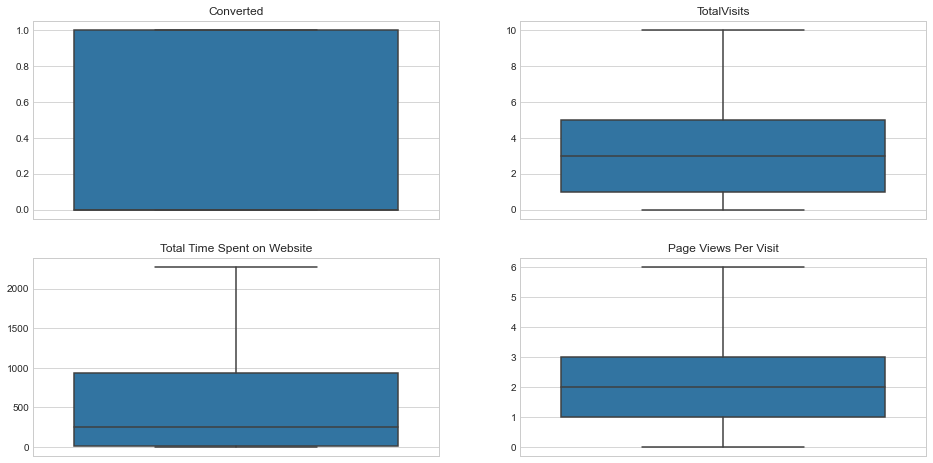

In [79]:
#Sanity Check
i=1
plt.figure(figsize=[16,8])
for col in ['Converted', 'TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']:
    plt.subplot(2,2,i)
    sns.boxplot(y=lead[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

### 4.1 Convert Binary Categories

In [80]:
#Checking Unique value counts
lead.nunique()

Lead Origin                           5
Lead Source                           9
Do Not Email                          2
Converted                             2
TotalVisits                          11
Total Time Spent on Website        1731
Page Views Per Visit                 91
Last Activity                        11
Specialization                       19
What is your current occupation       7
dtype: int64

In [81]:
#value counts of Do Not Email coulmn
lead["Do Not Email"].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [82]:
#mapping yes to 1 and no to 0
lead['Do Not Email'] = lead['Do Not Email'].map({"Yes":1,"No":0})

In [83]:
#sanity check
lead["Do Not Email"].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

### 4.2 Dummy Variables

In [84]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation'],
      dtype='object')

In [85]:
#Creating a dummy variable for  categorical variables with 2+ levels and dropping the first one.
dummy= pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'What is your current occupation', 'Last Activity', 'Specialization']],drop_first=True)

In [86]:
#adding the dummy variables in main dataset
lead=pd.concat([lead,dummy],axis=1)

In [87]:
lead.shape

(9240, 56)

In [88]:
#dropping the original categorical variables from which dummy variables are derived
lead.drop(['Lead Origin', 'Lead Source', 'What is your current occupation', 'Last Activity', 'Specialization'],inplace=True,axis=1)

In [89]:
#sanity check
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Converted                                             9240 non-null   int64  
 2   TotalVisits                                           9240 non-null   float64
 3   Total Time Spent on Website                           9240 non-null   int64  
 4   Page Views Per Visit                                  9240 non-null   float64
 5   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 6   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 7   Lead Origin_Lead Import                               9240 non-null   uint8  
 8   Lead Origin_Quick Add Form                            9240

### 4.2 Test Train Split

In [90]:
# Target/Dependent variable
y=lead["Converted"]

# Independent Variables
X=lead.drop(['Converted'], axis=1)

In [91]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Not specified,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not applicable,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [92]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [93]:
#sanity check
print(f"Shape of X_train is: {X_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}\n")
print(f"Shape of y_train is: {y_train.shape}\n")
print(f"Shape of y_test is: {y_test.shape}\n")

Shape of X_train is: (6468, 50)

Shape of X_test is: (2772, 50)

Shape of y_train is: (6468,)

Shape of y_test is: (2772,)



### 4.3 Feature Scaling

In [94]:
scaler=StandardScaler()
X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])


* Feature Scaling: Numeric attributes are  standardized so that they have a common mean of zero, if they were measured on different scales

In [95]:
#sanity check
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Not specified,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not applicable,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1871,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6795,0,0.299722,0.005716,-0.516439,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3516,0,0.662077,-0.691418,0.143543,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8105,0,0.662077,1.365219,1.553761,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3934,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### 5. Model Building

### 5.1 Feature selection: RFE

In [96]:
log_reg=LogisticRegression()
rfe=RFE(log_reg,20).fit(X_train,y_train)



In [97]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Other Lead Sources', False, 3),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Not specified', True, 1),
 ('What is your current occupation_Other', False, 7),
 ('What is your current occupation_Student', False, 9),
 ('What is your current occupation_Unemployed', False, 8),
 ('What is your current occupation_Working Professional', True, 1),
 ('La

In [98]:
#Columns selected by RFE
rfe_columns=list(X_train.columns[rfe.support_])
rfe_columns

['Do Not Email',
 'Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Facebook',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'What is your current occupation_Housewife',
 'What is your current occupation_Not specified',
 'What is your current occupation_Working Professional',
 'Last Activity_Email Opened',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Other Activities',
 'Last Activity_SMS Sent',
 'Last Activity_Unreachable',
 'Last Activity_Unsubscribed',
 'Specialization_Hospitality Management',
 'Specialization_Not applicable',
 'Specialization_Retail Management',
 'Specialization_Rural and Agribusiness']

In [99]:
#columns Eliminated by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other Lead Sources',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specializatio

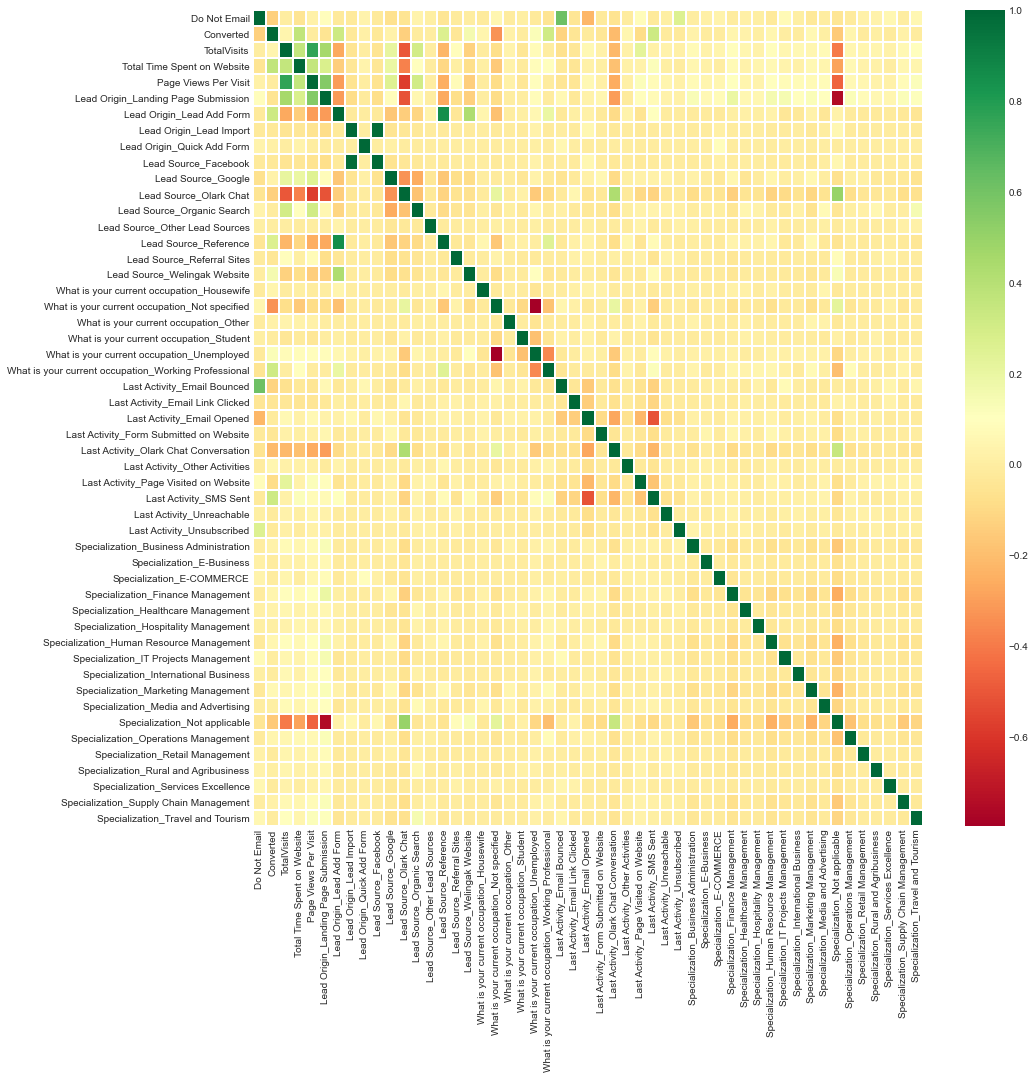

In [100]:
# Visualizing the data using heatmap
plt.figure(figsize=[15,15])
sns.heatmap(lead.corr(), cmap="RdYlGn",linewidth =1)
plt.show()

In [101]:
# Top 5 Positive correlated variables
corr_lead = lead.corr()
corr_lead = corr_lead.where(np.triu(np.ones(corr_lead.shape),k=1).astype(np.bool))
corr_df = corr_lead.unstack().reset_index()
corr_df.columns =['VAR1','VAR2','Correlation']
corr_df.dropna(subset = ["Correlation"], inplace = True) 
corr_df.sort_values(by='Correlation', ascending=False, inplace=True)


corr_df.head(5)

,VAR1,VAR2,Correlation
466,Lead Source_Facebook,Lead Origin_Lead Import,0.981709
720,Lead Source_Reference,Lead Origin_Lead Add Form,0.853237
206,Page Views Per Visit,TotalVisits,0.767585
1173,Last Activity_Email Bounced,Do Not Email,0.618470
259,Lead Origin_Landing Page Submission,Page Views Per Visit,0.553423


In [102]:
# Top 5 Negatively correlated variables
corr_df.sort_values(by='Correlation', ascending=True, inplace=True)


corr_df.head(5)

,VAR1,VAR2,Correlation
1089,What is your current occupation_Unemployed,What is your current occupation_Not specified,-0.794875
2249,Specialization_Not applicable,Lead Origin_Landing Page Submission,-0.748263
565,Lead Source_Olark Chat,Page Views Per Visit,-0.573334
566,Lead Source_Olark Chat,Lead Origin_Landing Page Submission,-0.512950
1555,Last Activity_SMS Sent,Last Activity_Email Opened,-0.512325


In [103]:
# function to build logistic regression model

def log_model_func(features):
    X_train_new=X_train[features]
    X_train_sm=sm.add_constant(X_train_new)
    log_model=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
    return (log_model,X_train_sm)

# function to estimate VIF
def VIF(X_train):  
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])] 
    vif['VIF'] = round(vif['VIF'],2)
    vif.sort_values(by='VIF', ascending = False, inplace=True)  
    return(vif) 


### 5.2 Model 1

In [104]:
features=rfe_columns
model1, X_train_sm1 = log_model_func(features)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.5
Date:                Sat, 02 Apr 2022   Deviance:                       5200.9
Time:                        13:19:44   Pearson chi2:                 8.03e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7869      0.150     -5.233      0.000      -1.082      -0.492
Do Not Email                                            -1.1731      0.182     -6.435      0.000      -1.530      -0.816
Total Time Spent on Website                              1.0654      0.040     26.623      0.000       0.987       1.144
Lead Origin_Landing Page Submission                     -1.0426      0.129     -8.058      0.000      -1.296      -0.789
Lead Origin_Lead Add Form                                2.7686      0.204     13.566      0.000       2.369       3.169
Lead Source_Facebook                                    -0.6626      0.523     -1.267      0.205      -1.687       0.362
Lead Source_Olark Chat                                   1.0824      0.124      8.742      0.000       0.840       1.325
Lead Source_Welingak Website                             2.4808      0.750      3.309      0.001       1.011       3.950
What is your current occupation_Housewife               22.7618   1.35e+04      0.002      0.999   -2.65e+04    2.66e+04
What is your current occupation_Not specified           -1.0783      0.088    -12.306      0.000      -1.250      -0.907
What is your current occupation_Working Professional     2.4080      0.190     12.683      0.000       2.036       2.780
Last Activity_Email Opened                               0.7348      0.110      6.660      0.000       0.519       0.951
Last Activity_Olark Chat Conversation                   -0.6021      0.192     -3.141      0.002      -0.978      -0.226
Last Activity_Other Activities                           2.2497      0.488      4.608      0.000       1.293       3.207
Last Activity_SMS Sent                                   1.8816      0.112     16.847      0.000       1.663       2.100
Last Activity_Unreachable                                0.8678      0.368      2.361      0.018       0.147       1.588
Last Activity_Unsubscribed                               1.3689      0.484      2.829      0.005       0.421       2.317
Specialization_Hospitality Management                   -0.9777      0.328     -2.978      0.003      -1.621      -0.334
Specialization_Not applicable                           -0.9752      0.124     -7.870      0.000      -1.218      -0.732
Specialization_Retail Management                        -0.4160      0.337     -1.236      0.217      -1.076       0.244
Specialization_Rural and Agribusiness                    0.5288      0.390      1.357      0.175      -0.235       1.293
========================================================================================================================
"""

In [105]:
#Checking VIF values
VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,3.01
17,Specialization_Not applicable,2.78
10,Last Activity_Email Opened,2.58
13,Last Activity_SMS Sent,2.29
5,Lead Source_Olark Chat,2.20
11,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.64
8,What is your current occupation_Not specified,1.61
0,Do Not Email,1.27
6,Lead Source_Welingak Website,1.27


#### Observation:
Variable `What is your current occupation_Housewife` is having High P-Value, hence dropping the variable


### 5.3 Model 2

In [106]:
features.remove("What is your current occupation_Housewife")
model2, X_train_sm2 = log_model_func(features)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.0
Date:                Sat, 02 Apr 2022   Deviance:                       5214.0
Time:                        13:19:44   Pearson chi2:                 8.06e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7773      0.150     -5.180      0.000      -1.071      -0.483
Do Not Email                                            -1.1788      0.182     -6.468      0.000      -1.536      -0.822
Total Time Spent on Website                              1.0644      0.040     26.627      0.000       0.986       1.143
Lead Origin_Landing Page Submission                     -1.0381      0.129     -8.029      0.000      -1.292      -0.785
Lead Origin_Lead Add Form                                2.7849      0.204     13.661      0.000       2.385       3.184
Lead Source_Facebook                                    -0.6639      0.523     -1.270      0.204      -1.688       0.360
Lead Source_Olark Chat                                   1.0818      0.124      8.740      0.000       0.839       1.324
Lead Source_Welingak Website                             2.4637      0.750      3.286      0.001       0.994       3.933
What is your current occupation_Not specified           -1.0822      0.088    -12.359      0.000      -1.254      -0.911
What is your current occupation_Working Professional     2.3994      0.190     12.643      0.000       2.027       2.771
Last Activity_Email Opened                               0.7327      0.110      6.663      0.000       0.517       0.948
Last Activity_Olark Chat Conversation                   -0.6074      0.192     -3.171      0.002      -0.983      -0.232
Last Activity_Other Activities                           2.2402      0.488      4.588      0.000       1.283       3.197
Last Activity_SMS Sent                                   1.8716      0.111     16.805      0.000       1.653       2.090
Last Activity_Unreachable                                0.8567      0.368      2.331      0.020       0.136       1.577
Last Activity_Unsubscribed                               1.3645      0.484      2.820      0.005       0.416       2.313
Specialization_Hospitality Management                   -0.9849      0.328     -3.000      0.003      -1.628      -0.341
Specialization_Not applicable                           -0.9793      0.124     -7.907      0.000      -1.222      -0.737
Specialization_Retail Management                        -0.4224      0.336     -1.256      0.209      -1.082       0.237
Specialization_Rural and Agribusiness                    0.5204      0.390      1.336      0.182      -0.243       1.284
========================================================================================================================
"""

In [107]:
VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,3.00
16,Specialization_Not applicable,2.78
9,Last Activity_Email Opened,2.57
12,Last Activity_SMS Sent,2.29
5,Lead Source_Olark Chat,2.20
10,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.64
7,What is your current occupation_Not specified,1.61
0,Do Not Email,1.27
6,Lead Source_Welingak Website,1.27


#### Observation:
Variable `Specialization_Retail Management` is having High P-Value, hence dropping the variable

### 5.4 Model 3

In [108]:
features.remove("Specialization_Retail Management")
model3, X_train_sm3 = log_model_func(features)
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.8
Date:                Sat, 02 Apr 2022   Deviance:                       5215.6
Time:                        13:19:45   Pearson chi2:                 8.10e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7834      0.150     -5.222      0.000      -1.077      -0.489
Do Not Email                                            -1.1828      0.182     -6.495      0.000      -1.540      -0.826
Total Time Spent on Website                              1.0628      0.040     26.621      0.000       0.985       1.141
Lead Origin_Landing Page Submission                     -1.0411      0.129     -8.050      0.000      -1.295      -0.788
Lead Origin_Lead Add Form                                2.7834      0.204     13.653      0.000       2.384       3.183
Lead Source_Facebook                                    -0.6640      0.522     -1.271      0.204      -1.688       0.360
Lead Source_Olark Chat                                   1.0789      0.124      8.719      0.000       0.836       1.321
Lead Source_Welingak Website                             2.4644      0.750      3.287      0.001       0.995       3.934
What is your current occupation_Not specified           -1.0816      0.088    -12.353      0.000      -1.253      -0.910
What is your current occupation_Working Professional     2.3991      0.190     12.636      0.000       2.027       2.771
Last Activity_Email Opened                               0.7357      0.110      6.692      0.000       0.520       0.951
Last Activity_Olark Chat Conversation                   -0.6033      0.192     -3.150      0.002      -0.979      -0.228
Last Activity_Other Activities                           2.2470      0.488      4.604      0.000       1.290       3.204
Last Activity_SMS Sent                                   1.8734      0.111     16.819      0.000       1.655       2.092
Last Activity_Unreachable                                0.8548      0.368      2.320      0.020       0.133       1.577
Last Activity_Unsubscribed                               1.3745      0.484      2.841      0.004       0.426       2.323
Specialization_Hospitality Management                   -0.9772      0.328     -2.977      0.003      -1.621      -0.334
Specialization_Not applicable                           -0.9745      0.124     -7.869      0.000      -1.217      -0.732
Specialization_Rural and Agribusiness                    0.5275      0.389      1.354      0.176      -0.236       1.291
========================================================================================================================
"""

In [109]:
VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.99
16,Specialization_Not applicable,2.78
9,Last Activity_Email Opened,2.57
12,Last Activity_SMS Sent,2.29
5,Lead Source_Olark Chat,2.20
10,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.64
7,What is your current occupation_Not specified,1.61
0,Do Not Email,1.27
6,Lead Source_Welingak Website,1.27


#### Observation:
Variable `Lead Source_Facebook` is having High P-Value, hence dropping the variable

### 5.5 Model 4

In [110]:
features.remove("Lead Source_Facebook")
model4, X_train_sm4 = log_model_func(features)
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.7
Date:                Sat, 02 Apr 2022   Deviance:                       5217.4
Time:                        13:19:45   Pearson chi2:                 8.11e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7996      0.149     -5.351      0.000      -1.092      -0.507
Do Not Email                                            -1.1830      0.182     -6.495      0.000      -1.540      -0.826
Total Time Spent on Website                              1.0655      0.040     26.715      0.000       0.987       1.144
Lead Origin_Landing Page Submission                     -1.0226      0.128     -7.968      0.000      -1.274      -0.771
Lead Origin_Lead Add Form                                2.8043      0.203     13.797      0.000       2.406       3.203
Lead Source_Olark Chat                                   1.0978      0.123      8.926      0.000       0.857       1.339
Lead Source_Welingak Website                             2.4624      0.750      3.284      0.001       0.993       3.932
What is your current occupation_Not specified           -1.0808      0.088    -12.341      0.000      -1.252      -0.909
What is your current occupation_Working Professional     2.3977      0.190     12.633      0.000       2.026       2.770
Last Activity_Email Opened                               0.7300      0.110      6.643      0.000       0.515       0.945
Last Activity_Olark Chat Conversation                   -0.6028      0.192     -3.147      0.002      -0.978      -0.227
Last Activity_Other Activities                           2.2481      0.488      4.604      0.000       1.291       3.205
Last Activity_SMS Sent                                   1.8703      0.111     16.792      0.000       1.652       2.089
Last Activity_Unreachable                                0.8558      0.369      2.322      0.020       0.134       1.578
Last Activity_Unsubscribed                               1.3743      0.484      2.840      0.005       0.426       2.323
Specialization_Hospitality Management                   -0.9888      0.327     -3.020      0.003      -1.630      -0.347
Specialization_Not applicable                           -0.9715      0.124     -7.861      0.000      -1.214      -0.729
Specialization_Rural and Agribusiness                    0.5291      0.390      1.358      0.174      -0.234       1.293
========================================================================================================================
"""

In [111]:
VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.98
15,Specialization_Not applicable,2.77
8,Last Activity_Email Opened,2.55
11,Last Activity_SMS Sent,2.28
4,Lead Source_Olark Chat,2.18
9,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.63
6,What is your current occupation_Not specified,1.61
0,Do Not Email,1.27
5,Lead Source_Welingak Website,1.27


#### Observation:
Variable `Specialization_Rural and Agribusiness` is having High P-Value, hence dropping the variable

### 5.6 Model 5

In [112]:
features.remove("Specialization_Rural and Agribusiness")
model5, X_train_sm5 = log_model_func(features)
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2609.6
Date:                Sat, 02 Apr 2022   Deviance:                       5219.2
Time:                        13:19:45   Pearson chi2:                 8.12e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7911      0.149     -5.302      0.000      -1.084      -0.499
Do Not Email                                            -1.1811      0.182     -6.492      0.000      -1.538      -0.824
Total Time Spent on Website                              1.0651      0.040     26.711      0.000       0.987       1.143
Lead Origin_Landing Page Submission                     -1.0227      0.128     -7.972      0.000      -1.274      -0.771
Lead Origin_Lead Add Form                                2.8029      0.203     13.794      0.000       2.405       3.201
Lead Source_Olark Chat                                   1.0993      0.123      8.940      0.000       0.858       1.340
Lead Source_Welingak Website                             2.4629      0.750      3.285      0.001       0.993       3.932
What is your current occupation_Not specified           -1.0818      0.088    -12.357      0.000      -1.253      -0.910
What is your current occupation_Working Professional     2.3966      0.190     12.627      0.000       2.025       2.769
Last Activity_Email Opened                               0.7288      0.110      6.636      0.000       0.514       0.944
Last Activity_Olark Chat Conversation                   -0.6068      0.191     -3.169      0.002      -0.982      -0.231
Last Activity_Other Activities                           2.2419      0.488      4.592      0.000       1.285       3.199
Last Activity_SMS Sent                                   1.8672      0.111     16.782      0.000       1.649       2.085
Last Activity_Unreachable                                0.8487      0.368      2.303      0.021       0.126       1.571
Last Activity_Unsubscribed                               1.3906      0.485      2.865      0.004       0.439       2.342
Specialization_Hospitality Management                   -0.9951      0.327     -3.040      0.002      -1.637      -0.353
Specialization_Not applicable                           -0.9785      0.123     -7.927      0.000      -1.220      -0.737
========================================================================================================================
"""

In [113]:
VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.97
15,Specialization_Not applicable,2.77
8,Last Activity_Email Opened,2.55
11,Last Activity_SMS Sent,2.28
4,Lead Source_Olark Chat,2.18
9,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.63
6,What is your current occupation_Not specified,1.61
0,Do Not Email,1.27
5,Lead Source_Welingak Website,1.27


#### Observation:
All the features have significant P Values and VIF under 5. So next, we will look into WoE and Coefficient value to remove features. For coefficient, we will concentrate on negative coefficeints to remove, as we want more positive feature which can indicate identifying right candidate for lead conversion or how to improve further leads.

### 5.7 Model 6

In [114]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [115]:
for col in lead.columns:
    if col in features:
        df, iv = calculate_woe_iv(lead, col, 'Converted')
        print('IV score of feature : ',col, " is ", round(iv,4))

IV score of feature :  Do Not Email  is  0.0954
IV score of feature :  Total Time Spent on Website  is  0.6012
IV score of feature :  Lead Origin_Landing Page Submission  is  0.0111
IV score of feature :  Lead Origin_Lead Add Form  is  0.5615
IV score of feature :  Lead Source_Olark Chat  is  0.0763
IV score of feature :  Lead Source_Welingak Website  is  0.1853
IV score of feature :  What is your current occupation_Not specified  is  0.5436
IV score of feature :  What is your current occupation_Working Professional  is  0.5227
IV score of feature :  Last Activity_Email Opened  is  0.0008
IV score of feature :  Last Activity_Olark Chat Conversation  is  0.2711
IV score of feature :  Last Activity_Other Activities  is  0.0115
IV score of feature :  Last Activity_SMS Sent  is  0.4467
IV score of feature :  Last Activity_Unreachable  is  0.0005
IV score of feature :  Last Activity_Unsubscribed  is  0.002
IV score of feature :  Specialization_Hospitality Management  is  0.0003
IV score of 

#### Observation:
We will drop `What is your current occupation_Not specified` feature due high negative coefficient.Also it is imputed data by treating the null values. It means that the this feature indicates that some leads have not filled this Occupation column. It is difficult to interpret and take action on this feature in future. Thus we will remove this feature first.

In [116]:
features.remove("What is your current occupation_Not specified")
model6, X_train_sm6 = log_model_func(features)
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2692.6
Date:                Sat, 02 Apr 2022   Deviance:                       5385.3
Time:                        13:19:56   Pearson chi2:                 9.29e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9498      0.147     -6.462      0.000      -1.238      -0.662
Do Not Email                                            -1.2101      0.180     -6.737      0.000      -1.562      -0.858
Total Time Spent on Website                              1.0645      0.039     27.173      0.000       0.988       1.141
Lead Origin_Landing Page Submission                     -1.1249      0.127     -8.858      0.000      -1.374      -0.876
Lead Origin_Lead Add Form                                3.0424      0.203     15.003      0.000       2.645       3.440
Lead Source_Olark Chat                                   1.0190      0.121      8.453      0.000       0.783       1.255
Lead Source_Welingak Website                             2.5641      0.751      3.416      0.001       1.093       4.035
What is your current occupation_Working Professional     2.6324      0.190     13.826      0.000       2.259       3.006
Last Activity_Email Opened                               0.7520      0.108      6.942      0.000       0.540       0.964
Last Activity_Olark Chat Conversation                   -0.7008      0.189     -3.705      0.000      -1.072      -0.330
Last Activity_Other Activities                           2.3149      0.477      4.848      0.000       1.379       3.251
Last Activity_SMS Sent                                   1.9088      0.110     17.370      0.000       1.693       2.124
Last Activity_Unreachable                                0.9073      0.361      2.515      0.012       0.200       1.614
Last Activity_Unsubscribed                               1.3455      0.485      2.776      0.005       0.396       2.295
Specialization_Hospitality Management                   -1.0573      0.323     -3.273      0.001      -1.690      -0.424
Specialization_Not applicable                           -1.1856      0.122     -9.724      0.000      -1.425      -0.947
========================================================================================================================
"""

In [117]:
VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.81
14,Specialization_Not applicable,2.58
7,Last Activity_Email Opened,2.54
10,Last Activity_SMS Sent,2.28
4,Lead Source_Olark Chat,2.16
8,Last Activity_Olark Chat Conversation,1.75
3,Lead Origin_Lead Add Form,1.63
0,Do Not Email,1.27
5,Lead Source_Welingak Website,1.26
1,Total Time Spent on Website,1.25


In [118]:
for col in lead.columns:
    if col in features:
        df, iv = calculate_woe_iv(lead, col, 'Converted')
        print('IV score of column : ',col, " is ", round(iv,4))

IV score of column :  Do Not Email  is  0.0954
IV score of column :  Total Time Spent on Website  is  0.6012
IV score of column :  Lead Origin_Landing Page Submission  is  0.0111
IV score of column :  Lead Origin_Lead Add Form  is  0.5615
IV score of column :  Lead Source_Olark Chat  is  0.0763
IV score of column :  Lead Source_Welingak Website  is  0.1853
IV score of column :  What is your current occupation_Working Professional  is  0.5227
IV score of column :  Last Activity_Email Opened  is  0.0008
IV score of column :  Last Activity_Olark Chat Conversation  is  0.2711
IV score of column :  Last Activity_Other Activities  is  0.0115
IV score of column :  Last Activity_SMS Sent  is  0.4467
IV score of column :  Last Activity_Unreachable  is  0.0005
IV score of column :  Last Activity_Unsubscribed  is  0.002
IV score of column :  Specialization_Hospitality Management  is  0.0003
IV score of column :  Specialization_Not applicable  is  0.1036


#### Observation:
We will remove 'Specialization_Not applicable' due to difficulty of interpretability of the data as againg this "Other" category is combination of various specialization which has been comined in smaller chunks.

### 5.8 Model 7

In [119]:
features.remove("Specialization_Not applicable")
model7, X_train_sm7 = log_model_func(features)
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.6
Date:                Sat, 02 Apr 2022   Deviance:                       5483.2
Time:                        13:20:07   Pearson chi2:                 8.56e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8587      0.114    -16.247      0.000      -2.083      -1.634
Do Not Email                                            -1.2343      0.179     -6.904      0.000      -1.585      -0.884
Total Time Spent on Website                              1.0914      0.039     28.047      0.000       1.015       1.168
Lead Origin_Landing Page Submission                     -0.2458      0.087     -2.821      0.005      -0.417      -0.075
Lead Origin_Lead Add Form                                3.4428      0.198     17.359      0.000       3.054       3.832
Lead Source_Olark Chat                                   0.9740      0.117      8.346      0.000       0.745       1.203
Lead Source_Welingak Website                             1.9818      0.747      2.652      0.008       0.517       3.446
What is your current occupation_Working Professional     2.8261      0.186     15.157      0.000       2.461       3.192
Last Activity_Email Opened                               0.7555      0.107      7.052      0.000       0.545       0.965
Last Activity_Olark Chat Conversation                   -0.7715      0.184     -4.189      0.000      -1.132      -0.411
Last Activity_Other Activities                           2.3341      0.481      4.855      0.000       1.392       3.276
Last Activity_SMS Sent                                   1.8690      0.109     17.190      0.000       1.656       2.082
Last Activity_Unreachable                                0.9374      0.358      2.621      0.009       0.236       1.638
Last Activity_Unsubscribed                               1.3479      0.478      2.819      0.005       0.411       2.285
Specialization_Hospitality Management                   -0.8762      0.318     -2.756      0.006      -1.499      -0.253
========================================================================================================================
"""

In [120]:
VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.39
4,Lead Source_Olark Chat,1.98
7,Last Activity_Email Opened,1.97
10,Last Activity_SMS Sent,1.84
3,Lead Origin_Lead Add Form,1.62
8,Last Activity_Olark Chat Conversation,1.48
1,Total Time Spent on Website,1.25
5,Lead Source_Welingak Website,1.24
0,Do Not Email,1.21
6,What is your current occupation_Working Profes...,1.18


In [121]:
for col in lead.columns:
    if col in features:
        df, iv = calculate_woe_iv(lead, col, 'Converted')
        print('IV score of column : ',col, " is ", round(iv,4))

IV score of column :  Do Not Email  is  0.0954
IV score of column :  Total Time Spent on Website  is  0.6012
IV score of column :  Lead Origin_Landing Page Submission  is  0.0111
IV score of column :  Lead Origin_Lead Add Form  is  0.5615
IV score of column :  Lead Source_Olark Chat  is  0.0763
IV score of column :  Lead Source_Welingak Website  is  0.1853
IV score of column :  What is your current occupation_Working Professional  is  0.5227
IV score of column :  Last Activity_Email Opened  is  0.0008
IV score of column :  Last Activity_Olark Chat Conversation  is  0.2711
IV score of column :  Last Activity_Other Activities  is  0.0115
IV score of column :  Last Activity_SMS Sent  is  0.4467
IV score of column :  Last Activity_Unreachable  is  0.0005
IV score of column :  Last Activity_Unsubscribed  is  0.002
IV score of column :  Specialization_Hospitality Management  is  0.0003


#### Observation
We will remove `Specialization_Hospitality Management` due to lowest WoE value and it also has negative coefficient value.

### 5.9 Model 8


In [122]:
features.remove("Specialization_Hospitality Management")
model8, X_train_sm8 = log_model_func(features)
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2745.5
Date:                Sat, 02 Apr 2022   Deviance:                       5491.0
Time:                        13:20:18   Pearson chi2:                 8.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8600      0.114    -16.274      0.000      -2.084      -1.636
Do Not Email                                            -1.2357      0.179     -6.916      0.000      -1.586      -0.886
Total Time Spent on Website                              1.0867      0.039     28.001      0.000       1.011       1.163
Lead Origin_Landing Page Submission                     -0.2556      0.087     -2.937      0.003      -0.426      -0.085
Lead Origin_Lead Add Form                                3.4094      0.197     17.300      0.000       3.023       3.796
Lead Source_Olark Chat                                   0.9719      0.117      8.333      0.000       0.743       1.201
Lead Source_Welingak Website                             2.0138      0.747      2.696      0.007       0.550       3.478
What is your current occupation_Working Professional     2.8176      0.186     15.122      0.000       2.452       3.183
Last Activity_Email Opened                               0.7551      0.107      7.056      0.000       0.545       0.965
Last Activity_Olark Chat Conversation                   -0.7730      0.184     -4.200      0.000      -1.134      -0.412
Last Activity_Other Activities                           2.3422      0.480      4.878      0.000       1.401       3.283
Last Activity_SMS Sent                                   1.8669      0.109     17.194      0.000       1.654       2.080
Last Activity_Unreachable                                0.9287      0.357      2.603      0.009       0.229       1.628
Last Activity_Unsubscribed                               1.3208      0.483      2.736      0.006       0.375       2.267
========================================================================================================================
"""

In [123]:
VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.38
4,Lead Source_Olark Chat,1.98
7,Last Activity_Email Opened,1.97
10,Last Activity_SMS Sent,1.84
3,Lead Origin_Lead Add Form,1.62
8,Last Activity_Olark Chat Conversation,1.48
1,Total Time Spent on Website,1.25
5,Lead Source_Welingak Website,1.24
0,Do Not Email,1.21
6,What is your current occupation_Working Profes...,1.18


#### Observation:
We will remove `Last Activity_Other Activities` because this is a parameter created by combining multiple smaller categories of Last Activity and % of these data in whole database is less than 0.03%

### 5.10 Model 9

In [124]:
features.remove("Last Activity_Other Activities")
model9, X_train_sm9 = log_model_func(features)
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2758.3
Date:                Sat, 02 Apr 2022   Deviance:                       5516.7
Time:                        13:20:18   Pearson chi2:                 7.38e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7701      0.111    -15.899      0.000      -1.988      -1.552
Do Not Email                                            -1.2616      0.177     -7.108      0.000      -1.609      -0.914
Total Time Spent on Website                              1.0870      0.039     28.093      0.000       1.011       1.163
Lead Origin_Landing Page Submission                     -0.2549      0.087     -2.937      0.003      -0.425      -0.085
Lead Origin_Lead Add Form                                3.4204      0.197     17.398      0.000       3.035       3.806
Lead Source_Olark Chat                                   0.9755      0.116      8.381      0.000       0.747       1.204
Lead Source_Welingak Website                             1.9893      0.746      2.667      0.008       0.527       3.451
What is your current occupation_Working Professional     2.8353      0.186     15.259      0.000       2.471       3.200
Last Activity_Email Opened                               0.6630      0.104      6.373      0.000       0.459       0.867
Last Activity_Olark Chat Conversation                   -0.8657      0.182     -4.748      0.000      -1.223      -0.508
Last Activity_SMS Sent                                   1.7766      0.106     16.813      0.000       1.569       1.984
Last Activity_Unreachable                                0.8386      0.356      2.355      0.019       0.141       1.537
Last Activity_Unsubscribed                               1.2519      0.482      2.596      0.009       0.307       2.197
========================================================================================================================
"""

In [125]:
VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.35
4,Lead Source_Olark Chat,1.97
7,Last Activity_Email Opened,1.95
9,Last Activity_SMS Sent,1.83
3,Lead Origin_Lead Add Form,1.61
8,Last Activity_Olark Chat Conversation,1.48
1,Total Time Spent on Website,1.24
5,Lead Source_Welingak Website,1.24
0,Do Not Email,1.21
6,What is your current occupation_Working Profes...,1.18


#### Observation:
We have a stable model where all P-values of features are significant and VIF values are below 3, signifiying that there is negligible multi-colinearity. Most of the feature coefficients are positive. 

### 6. Model Evalution : Train Dataset

In [126]:
 # Getting the predicted values on the train set
y_train_pred = model9.predict(X_train_sm9)
y_train_pred[:10]

1871    0.250866
6795    0.204929
3516    0.292520
8105    0.774801
3934    0.250866
4844    0.990165
3297    0.103836
8071    0.985248
987     0.247592
7423    0.895929
dtype: float64

In [127]:
y_train_pred=y_train_pred.values.reshape(-1)

In [128]:
#Creating a dataframe with the actual Converted values and the Predicted probabilities
y_train_pred_final=pd.DataFrame({"Converted":y_train.values,"Converted_probability":y_train_pred})
y_train_pred_final.head()

,Converted,Converted_probability
0,0,0.250866
1,0,0.204929
2,0,0.292520
3,0,0.774801
4,0,0.250866


In [129]:
# creating columns with different probability cutoffs 
cutoffs=[x/10.0 for x in range(10)]

for i in cutoffs:
    y_train_pred_final[i]=y_train_pred_final["Converted_probability"].map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Converted,Converted_probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.250866,1,1,1,0,0,0,0,0,0,0
1,0,0.204929,1,1,1,0,0,0,0,0,0,0
2,0,0.292520,1,1,1,0,0,0,0,0,0,0
3,0,0.774801,1,1,1,1,1,1,1,1,0,0
4,0,0.250866,1,1,1,0,0,0,0,0,0,0


In [130]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','Precision','Recall'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

for i in cutoffs:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec, rec, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci, prec[1], rec[1]]
cutoff_df

,prob,accuracy,sensi,speci,Precision,Recall
0.0,0.0,0.381262,1.000000,0.000000,1.000000,0.000000
0.1,0.1,0.591218,0.969181,0.358321,0.482049,0.969181
0.2,0.2,0.729128,0.917275,0.613193,0.593701,0.917275
0.3,0.3,0.796537,0.828873,0.776612,0.695711,0.828873
0.4,0.4,0.812616,0.756285,0.847326,0.753231,0.756285
0.5,0.5,0.811843,0.695864,0.883308,0.786074,0.695864
0.6,0.6,0.789889,0.578264,0.920290,0.817192,0.578264
0.7,0.7,0.775046,0.503244,0.942529,0.843644,0.503244
0.8,0.8,0.743816,0.376723,0.970015,0.885605,0.376723
0.9,0.9,0.711503,0.262774,0.988006,0.931034,0.262774


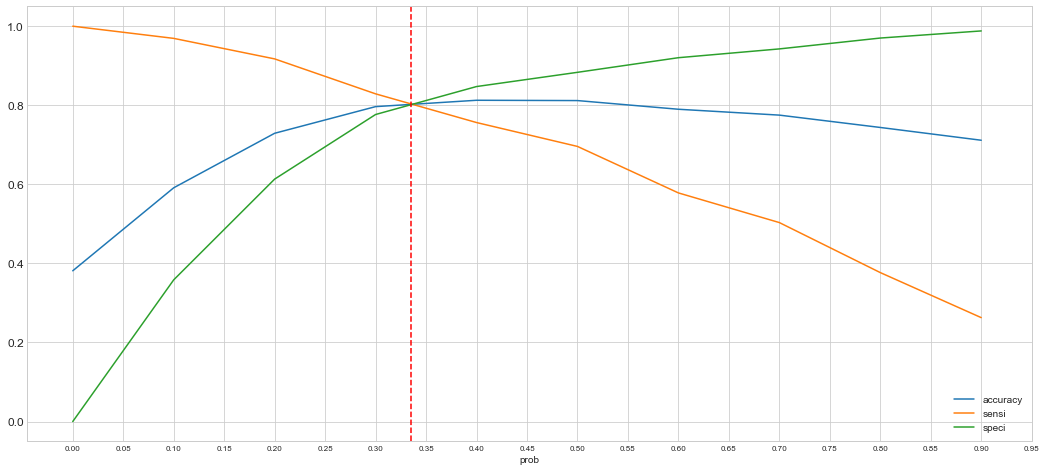

In [131]:
# # Let's plot accuracy sensitivity and specificity for various probabilities.
# #plt.figure(figsize=(20,20))

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize=(18, 8))
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.335, color='r', linestyle='--') # additing axline
plt.yticks(size=12)
plt.show()

#### Observation:
From the above graph, 0.335 seems to be ideal cut-off points

In [132]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_probability'].map( lambda x: 1 if x > 0.335 else 0)

# deleting the unnecessary columns
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 
y_train_pred_final.head()

,Converted,Converted_probability,final_predicted
0,0,0.250866,0
1,0,0.204929,0
2,0,0.292520,0
3,0,0.774801,1
4,0,0.250866,0


In [133]:
# overall accuracy.
metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"])

0.8055040197897341

In [134]:
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"] )
confusion

array([[3230,  772],
       [ 486, 1980]], dtype=int64)

In [135]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("sensitivity = " , TP / float(TP+FN))

# Let us calculate specificity
print("specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting converted when customer is not have converted
print("false postive rate = ", FP/ float(TN+FP))

# Precision
print("Precision = ",TP/float(FP+TP))

#Recall
print("Recall = ",TP/float(TP+FN))

# positive predictive value 
print ("positive predictive value = ",TP / float(TP+FP))

# Negative predictive value
print ("Negative predictive value = ",TN / float(TN+ FN))

sensitivity =  0.8029197080291971
specificity =  0.8070964517741129
false postive rate =  0.19290354822588707
Precision =  0.7194767441860465
Recall =  0.8029197080291971
positive predictive value =  0.7194767441860465
Negative predictive value =  0.8692142088266954


In [136]:
#F1 Score
print(f"F1 Score: {f1_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])}")

F1 Score: 0.7589114603296281


In [137]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_train_pred_final['Converted'], y_train_pred_final['final_predicted'] ) )

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4002
           1       0.72      0.80      0.76      2466

    accuracy                           0.81      6468
   macro avg       0.79      0.81      0.80      6468
weighted avg       0.81      0.81      0.81      6468



#### Insight:
Model 9 with cut off value at 0.335 is providing an Accuracy of 80.55%, Sensitivity of 80.29%. Sensitivity in this case indicates how many leads the model identify correctly out of all potential leads which are converting. More than 80% is what the CEO has requested in this case study. F1 Score and precision value in the model has higher number for 0's than 1's. This indicates that the model predicts leads which will not convert ( i.e. filtering leads that will not convert) than the leads which will convert.

### 6.1 ROC Curve

* It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity)
* The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
* The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [138]:
# Function to plot ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                                   drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 10))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

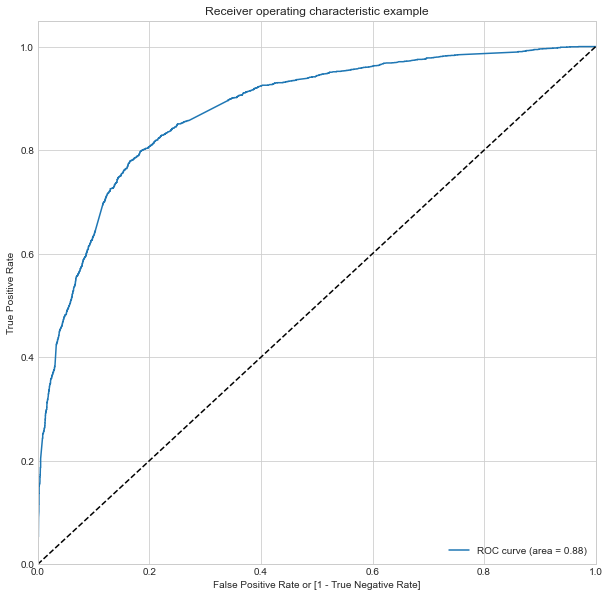

In [139]:
#plotting the ROC curve 
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_probability'])

#### Observation:
* ROC Curve area is 0.88, which indicates that the model is good

### 7. Model Evaluation: Test Data


In [140]:
#Scaling & transforming numerical features
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Not specified,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not applicable,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4269,0,1.749143,0.964504,2.117849,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2376,0,-1.149699,-0.885371,-1.266675,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7766,0,0.662077,-0.777416,1.553761,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9199,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4359,0,-1.149699,-0.885371,-1.266675,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [141]:
#sanity check
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Not specified,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not applicable,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4269,0,1.749143,0.964504,2.117849,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2376,0,-1.149699,-0.885371,-1.266675,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7766,0,0.662077,-0.777416,1.553761,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9199,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4359,0,-1.149699,-0.885371,-1.266675,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [142]:
#Selecting only those columns which were used in final model of Train Dataset
X_test = X_test[features]


In [143]:
#Sanity Check
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,What is your current occupation_Working Professional,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
4269,0,0.964504,0,0,0,0,0,0,0,1,0,0
2376,0,-0.885371,0,1,0,0,0,0,0,1,0,0
7766,0,-0.777416,0,0,0,0,1,0,0,0,1,0
9199,0,-0.885371,0,0,1,0,0,0,1,0,0,0
4359,0,-0.885371,0,1,0,0,0,1,0,0,0,0


In [144]:
#Add constant to test data
X_test_sm=sm.add_constant(X_test)

In [145]:
#Sanity Check
X_test_sm.columns

Index(['const', 'Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed'],
      dtype='object')

In [146]:
#Pedicting on final model
y_test_pred = model9.predict(X_test_sm)

In [147]:
y_test_pred[:10]

4269    0.741716
2376    0.921619
7766    0.742460
9199    0.067694
4359    0.794282
9186    0.501616
1631    0.423215
8963    0.177048
8007    0.090863
5324    0.290588
dtype: float64

In [148]:

# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()


,0
4269,0.741716
2376,0.921619
7766,0.742460
9199,0.067694
4359,0.794282


In [149]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [150]:
# Putting CustID to index
y_test_df['Cust_ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Cust_ID,0
0,1,4269,0.741716
1,1,2376,0.921619
2,1,7766,0.742460
3,0,9199,0.067694
4,1,4359,0.794282


In [151]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_probability'})
#y_pred_final= y_pred_final.rename(columns={ 'Converted' : 'Converted_IND'})

# Rearranging the columns
# y_pred_final = y_pred_final.reindex(['Prospect_IND','Cust_ID','Converted_probability'], axis=1)
# y_pred_final.head()

In [152]:
#Using cutt-off of 0.335  from Sentivity - Specificity - Accuracy trade off
y_pred_final['final_predicted'] = y_pred_final.Converted_probability.map(lambda x: 1 if x > 0.335 else 0)
y_pred_final.head()

,Converted,Cust_ID,Converted_probability,final_predicted
0,1,4269,0.741716,1
1,1,2376,0.921619,1
2,1,7766,0.742460,1
3,0,9199,0.067694,0
4,1,4359,0.794282,1


In [153]:
#checking the overall accuracy.
metrics.accuracy_score(y_pred_final["Converted"], y_pred_final["final_predicted"])

0.8048340548340548

In [154]:
confusion = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'] )
confusion

array([[1354,  323],
       [ 218,  877]], dtype=int64)

In [155]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("sensitivity = " , TP / float(TP+FN))

# Let us calculate specificity
print("specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting converted when customer is not have converted
print("false postive rate = ", FP/ float(TN+FP))

# Precision
print("Precision = ",TP/float(FP+TP))

#Recall
print("Recall = ",TP/float(TP+FN))

# positive predictive value 
print ("positive predictive value = ",TP / float(TP+FP))

# Negative predictive value
print ("Negative predictive value = ",TN / float(TN+ FN))

sensitivity =  0.8009132420091324
specificity =  0.8073941562313656
false postive rate =  0.19260584376863446
Precision =  0.7308333333333333
Recall =  0.8009132420091324
positive predictive value =  0.7308333333333333
Negative predictive value =  0.861323155216285


#### Observation:
The sensitivity value on Test data is 80.09% vs 80.29% in Train data. The accuracy values is 80.48%. It shows that model is performing well in test data set also and is not over-trained.

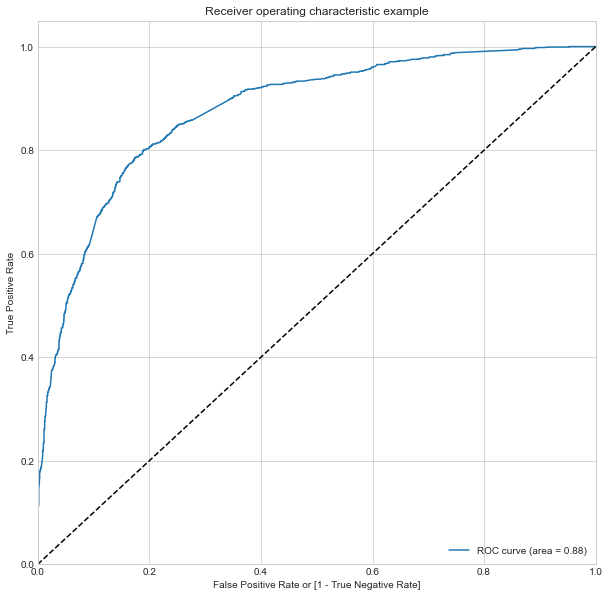

In [156]:
#ROC curve
draw_roc( y_pred_final['Converted'], y_pred_final['Converted_probability'])

#### Observation:
ROC value of 0.88 shows the model is performing well in Test dataset.

In [157]:
f1_score(y_pred_final['Converted'], y_pred_final['final_predicted'])

0.7642701525054466

In [158]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_pred_final['Converted'], y_pred_final['final_predicted'] ) )

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1677
           1       0.73      0.80      0.76      1095

    accuracy                           0.80      2772
   macro avg       0.80      0.80      0.80      2772
weighted avg       0.81      0.80      0.81      2772



In [159]:
#assigning Lead_score for the leads in Test Data Set : 
y_pred_final['lead_score']=(y_pred_final['Converted_probability']*100).astype("int64")
y_pred_final.sort_values(by='Converted_probability',ascending=False)

,Converted,Cust_ID,Converted_probability,final_predicted,lead_score
546,1,3478,0.999470,1,99
745,1,6383,0.999440,1,99
2405,1,5921,0.999034,1,99
1091,1,818,0.998702,1,99
2150,1,133,0.997865,1,99
...,...,...,...,...,...
2146,0,5472,0.014585,0,1
796,0,6934,0.014528,0,1
17,0,3545,0.010709,0,1
1396,0,7046,0.010483,0,1


In [160]:
y_pred_final.head()

,Converted,Cust_ID,Converted_probability,final_predicted,lead_score
0,1,4269,0.741716,1,74
1,1,2376,0.921619,1,92
2,1,7766,0.742460,1,74
3,0,9199,0.067694,0,6
4,1,4359,0.794282,1,79


#### Observation:
* We can use the lead_score column to identify which potential leads to prioritize first. The higher the score, the higher chances are there for the lead to convert. If there are limited sales representatives, then score cut-off should be higher to ensure a higher conversion probability people are contacted further to turn them into a potential customer. It is the same as increasing the precision value of the model by adjusting the cut-off point to a higher value. In case there are more resources available in the sales team (i.e., interns, etc. ), then the score cut-off can be lowered. As there are more human resources, the company can afford a higher rate of False positives as it will increase the customer outreach and, in turn, increase the potential customer who will take the online courses.

### 8. Model Parameters

In [167]:
pd.options.display.float_format = '{:.2f}'.format
final_parameters = model9.params
final_parameters

const                                                  -1.77
Do Not Email                                           -1.26
Total Time Spent on Website                             1.09
Lead Origin_Landing Page Submission                    -0.25
Lead Origin_Lead Add Form                               3.42
Lead Source_Olark Chat                                  0.98
Lead Source_Welingak Website                            1.99
What is your current occupation_Working Professional    2.84
Last Activity_Email Opened                              0.66
Last Activity_Olark Chat Conversation                  -0.87
Last Activity_SMS Sent                                  1.78
Last Activity_Unreachable                               0.84
Last Activity_Unsubscribed                              1.25
dtype: float64

### 9. Conclusion

#### Interpretation Logistic regression model with multiple predictor variables
* In general, we can have multiple predictor variables in a logistic regression model as below:

`logit(p) = log(p/(1-p))= β0 + β1* X1 + … + βn * Xn`

Applying such a model to our example dataset, each estimated coefficient is the expected change in the log odds of being a potential lead for a unit increase in the corresponding predictor variable holding the other predictor variables constant at a certain value. Each exponentiated coefficient is the ratio of two odds, or the change in odds in the multiplicative scale for a unit increase in the corresponding predictor variable holding other variables at a certain value.

#### The magnitude and sign of the coefficients loaded in the logit function:


#### logit(p) = log(p/(1-p)) = (3.42 * Lead Origin_Lead Add Form) + (2.84 * What is your current occupation_Working Professional) + (1.99 * Lead Source_Welingak Website) + (1.78 * Last Activity_SMS Sent) + (1.25 * Last Activity_Unsubscribed) + (1.09 * Total Time Spent on Website) + (0.98 * Lead Source_Olark Chat) + (0.84 * Last Activity_Unreachable) + (0.66 * Last Activity_Email Opened) - (0.25 * Lead Origin_Landing Page Submission) -(0.87 * Last Activity_Olark Chat Conversation) - (1.26 * Do Not Email) -1.77